# DIVYA RAJKUMAR

## GRIPJUNE21 - TASK 1

### Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 
This is a simple linear regression task as it involves just two variables.

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Importing Data

In [2]:
data = pd.read_csv('http://bit.ly/w-data')

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Dimension of dataset

In [4]:
data.shape # 25 observations and 2 features

(25, 2)

#### Information about data

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Five point summary of data

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


#### Plotting the distribution of scores

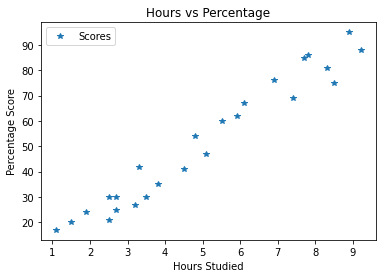

In [18]:
data.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [13]:
# From the above graph we can say that there is relation between Percentage Score and Hours Studies

#### Preparing the data

In [26]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

#### Spliting data into training and test sets.

Splitting the data by 70:30 ratio with random state zero, We'll do this by using Scikit-Learn's built-in train_test_split() method

In [27]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) 

#### Training the data using Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(x_train, y_train) 

LinearRegression()

#### Plotting the regression line

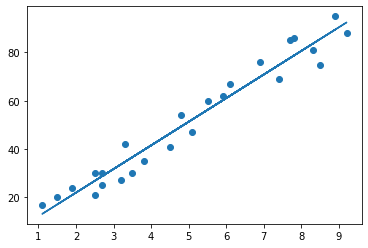

In [32]:
rline = (lr.coef_*x)+lr.intercept_ # Equation of line
plt.scatter(x, y)
plt.plot(x, rline);
plt.show()

#### Making Predictions

In [34]:
y_pred = lr.predict(x_test) # Predicting the scores

#### Comparing Actual vs Predicted

In [35]:
data_ap = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data_ap # Comparing the actual data with predicted data

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


#### Testing with given data

In [44]:
hours = [[9.25]]
pred = lr.predict(hours)
print("Predicted Score = ",pred)

Predicted Score =  [92.91505723]


In [ ]:
# predicted --> If a student study 9.25 hours, they can score 92.92 percentage of mark.

#### Evaluating the model

Using RMSE, we can easily plot a difference between the estimated and actual values of a parameter of the model. By this, we can clearly judge the efficiency of the model.

In [50]:
from sklearn import metrics  
mse = (metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Square Error:', np.sqrt(mse))

Root Mean Square Error: 4.792191274636315
